In [1]:
import pandas as pd
import numpy as np
import plotnine as p9
import scanpy as sc
import squidpy as sq
import tiledb
import tiledbsoma
from anndata import AnnData
import matplotlib.pyplot as plt
import anndata
import glob
from PIL import Image

In [2]:
N = 5

In [3]:
!mkdir "data/cosMx_human_liver/region_{N}_{N}"

mkdir: cannot create directory ‘data/cosMx_human_liver/region_5_5’: File exists


In [4]:
pd.set_option('display.max_columns', None)

In [5]:
adata = sc.read("data/cosMx_human_liver/LiverDataReleaseSeurat_newUMAP.h5ad")
adata

AnnData object with n_obs × n_vars = 793318 × 1000
    obs: 'RNA_pca_cluster_default', 'RNA_pca_cluster_default.1', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_negprobes', 'nFeature_negprobes', 'nCount_falsecode', 'nFeature_falsecode', 'fov', 'Area', 'AspectRatio', 'Width', 'Height', 'Mean.PanCK', 'Max.PanCK', 'Mean.CK8.18', 'Max.CK8.18', 'Mean.Membrane', 'Max.Membrane', 'Mean.CD45', 'Max.CD45', 'Mean.DAPI', 'Max.DAPI', 'cell_id', 'assay_type', 'Run_name', 'slide_ID_numeric', 'Run_Tissue_name', 'Panel', 'Mean.Yellow', 'Max.Yellow', 'Mean.CD298_B2M', 'Max.CD298_B2M', 'cell_ID', 'x_FOV_px', 'y_FOV_px', 'x_slide_mm', 'y_slide_mm', 'propNegative', 'complexity', 'errorCtEstimate', 'percOfDataFromError', 'qcFlagsRNACounts', 'qcFlagsCellCounts', 'qcFlagsCellPropNeg', 'qcFlagsCellComplex', 'qcFlagsCellArea', 'median_negprobes', 'negprobes_quantile_0.9', 'median_RNA', 'RNA_quantile_0.9', 'nCell', 'nCount', 'nCountPerCell', 'nFeaturePerCell', 'propNegativeCellAvg', 'complexityCellAvg', '

In [6]:
adata.obs.Run_Tissue_name.value_counts()

CancerousLiver    460441
NormalLiver       332877
Name: Run_Tissue_name, dtype: int64

In [7]:
adata.obs.x_FOV_px.min()

8

In [8]:
def show_image(img_path):
    import pyvips
    image = pyvips.Image.new_from_file(img_path)
    plt.imshow(image)
    plt.show()
    

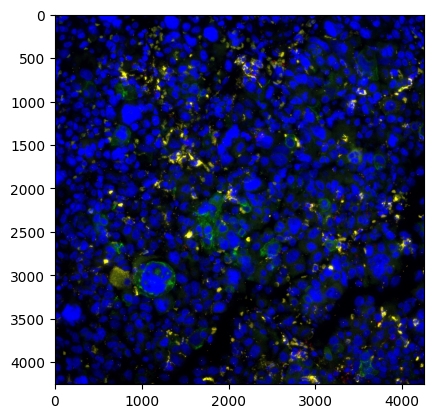

In [9]:
img_path = "data/cosMx_human_liver/LiverCancerFiles/CellStatsDir/CellComposite/CellComposite_F200.jpg"
show_image(img_path)

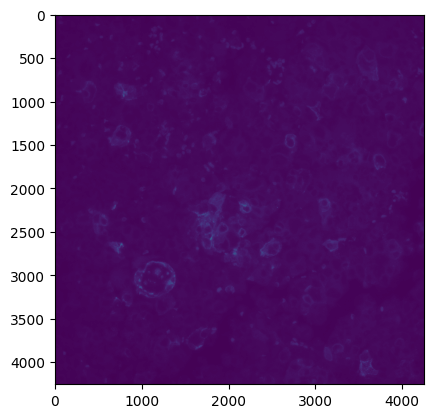

In [10]:
img_path = "data/cosMx_human_liver/LiverCancerFiles/CellStatsDir/Morpohology2D/20221008_005902_S3_C902_P99_N99_F200.TIF"
show_image(img_path)

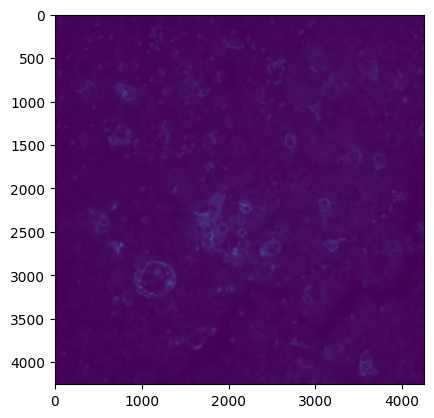

In [11]:
img_path = "data/cosMx_human_liver/LiverCancerFiles/CellStatsDir/Morphology2D_Normalized/20221008_005902_S3_C902_P99_N99_F200.TIF"
show_image(img_path)

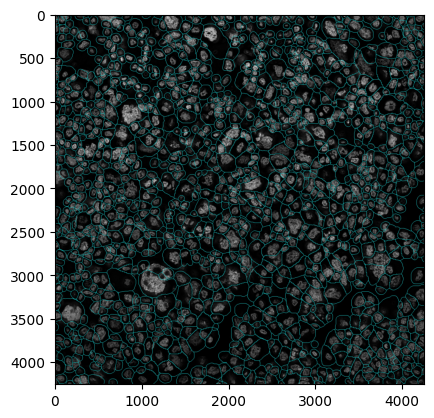

In [12]:
img_path = "data/cosMx_human_liver/LiverCancerFiles/CellStatsDir/CellOverlay/CellOverlay_F200.jpg"
show_image(img_path)

In [13]:
len(np.unique(glob.glob("data/cosMx_human_liver/LiverCancerFiles/CellStatsDir/CellComposite/CellComposite_*.jpg")))

383

In [14]:
len(adata.obs.fov.unique())

383

In [15]:
len(np.unique(glob.glob("data/cosMx_human_liver/NormalLiverFiles/CellStatsDir/CellComposite/CellComposite_*.jpg")))

304

In [16]:
adata.obs.cellType.value_counts() / len(adata)

tumor_1                         0.438649
Hep.4                           0.158823
Hep.5                           0.112608
tumor_2                         0.044604
CD3+.alpha.beta.T.cells         0.042539
Stellate.cells                  0.030606
Hep.3                           0.026816
Inflammatory.macrophages        0.026066
Non.inflammatory.macrophages    0.023486
Periportal.LSECs                0.022659
Hep.1                           0.021888
Mature.B.cells                  0.009961
Central.venous.LSECs            0.008262
Cholangiocytes                  0.007808
Hep.6                           0.007794
gamma.delta.T.cells.1           0.004702
NK.like.cells                   0.004358
Antibody.secreting.B.cells      0.003339
Portal.endothelial.cells        0.002013
Hep                             0.001518
Erthyroid.cells                 0.001491
NotDet                          0.000011
Name: cellType, dtype: float64

In [17]:
adata.obs.cellType.value_counts() / len(adata)

tumor_1                         0.438649
Hep.4                           0.158823
Hep.5                           0.112608
tumor_2                         0.044604
CD3+.alpha.beta.T.cells         0.042539
Stellate.cells                  0.030606
Hep.3                           0.026816
Inflammatory.macrophages        0.026066
Non.inflammatory.macrophages    0.023486
Periportal.LSECs                0.022659
Hep.1                           0.021888
Mature.B.cells                  0.009961
Central.venous.LSECs            0.008262
Cholangiocytes                  0.007808
Hep.6                           0.007794
gamma.delta.T.cells.1           0.004702
NK.like.cells                   0.004358
Antibody.secreting.B.cells      0.003339
Portal.endothelial.cells        0.002013
Hep                             0.001518
Erthyroid.cells                 0.001491
NotDet                          0.000011
Name: cellType, dtype: float64

In [18]:
adata = adata[adata.obs.cellType != "NotDet",:]

In [19]:
adata.obs.cellType = adata.obs.cellType.apply(lambda x: x.split(".")[0] if "Hep." in x else x)
adata.obs.cellType.value_counts()

/cluster/customapps/biomed/grlab/users/knonchev/miniconda3/envs/nonchev/lib/python3.9/site-packages/pandas/core/generic.py:5931: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


tumor_1                         347988
Hep                             261356
tumor_2                          35385
CD3+.alpha.beta.T.cells          33747
Stellate.cells                   24280
Inflammatory.macrophages         20679
Non.inflammatory.macrophages     18632
Periportal.LSECs                 17976
Mature.B.cells                    7902
Central.venous.LSECs              6554
Cholangiocytes                    6194
gamma.delta.T.cells.1             3730
NK.like.cells                     3457
Antibody.secreting.B.cells        2649
Portal.endothelial.cells          1597
Erthyroid.cells                   1183
Name: cellType, dtype: int64

In [20]:
adata.obs.niche.value_counts()

tumor            321889
Zone_2b          126939
Zone_2a          112282
interface         74800
tumor subtype     34517
Zone_3a           33409
non-malignant     29230
Zone_1b           26559
Zone_3b/CV        20177
Zone_1a/PV        13507
Name: niche, dtype: int64

In [21]:
tab = adata.obs[["Run_Tissue_name", "fov", "niche"]].value_counts().reset_index().groupby(["Run_Tissue_name", "fov"]).count().reset_index()
tab

,Run_Tissue_name,fov,niche,0
0,CancerousLiver,1,4,4
1,CancerousLiver,2,3,3
2,CancerousLiver,3,3,3
3,CancerousLiver,4,3,3
4,CancerousLiver,5,4,4
...,...,...,...,...
761,NormalLiver,379,0,0
762,NormalLiver,380,0,0
763,NormalLiver,381,0,0
764,NormalLiver,382,0,0


<Axes: ylabel='Frequency'>

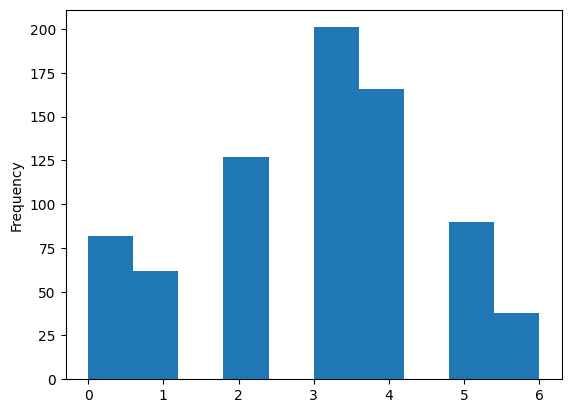

In [22]:
tab.niche.plot.hist()

In [23]:
normalLiver = adata[adata.obs.Run_Tissue_name == "NormalLiver",:]
normalLiver

View of AnnData object with n_obs × n_vars = 332873 × 1000
    obs: 'RNA_pca_cluster_default', 'RNA_pca_cluster_default.1', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_negprobes', 'nFeature_negprobes', 'nCount_falsecode', 'nFeature_falsecode', 'fov', 'Area', 'AspectRatio', 'Width', 'Height', 'Mean.PanCK', 'Max.PanCK', 'Mean.CK8.18', 'Max.CK8.18', 'Mean.Membrane', 'Max.Membrane', 'Mean.CD45', 'Max.CD45', 'Mean.DAPI', 'Max.DAPI', 'cell_id', 'assay_type', 'Run_name', 'slide_ID_numeric', 'Run_Tissue_name', 'Panel', 'Mean.Yellow', 'Max.Yellow', 'Mean.CD298_B2M', 'Max.CD298_B2M', 'cell_ID', 'x_FOV_px', 'y_FOV_px', 'x_slide_mm', 'y_slide_mm', 'propNegative', 'complexity', 'errorCtEstimate', 'percOfDataFromError', 'qcFlagsRNACounts', 'qcFlagsCellCounts', 'qcFlagsCellPropNeg', 'qcFlagsCellComplex', 'qcFlagsCellArea', 'median_negprobes', 'negprobes_quantile_0.9', 'median_RNA', 'RNA_quantile_0.9', 'nCell', 'nCount', 'nCountPerCell', 'nFeaturePerCell', 'propNegativeCellAvg', 'complexityCel

In [24]:
normalLiver.obs["x_array"] = normalLiver.obs.x_slide_mm.rank(method="dense").astype(int)
normalLiver.obs["y_array"] = normalLiver.obs.y_slide_mm.rank(method="dense").astype(int)

normalLiver.obs["x_region"] = pd.cut(normalLiver.obs["x_array"], N, labels=False)
normalLiver.obs["y_region"] = pd.cut(normalLiver.obs["y_array"], N, labels=False)
normalLiver.obs["region"] = normalLiver.obs.apply(lambda x: f"{x.x_region}-{x.y_region}", axis=1)
normalLiver.obs[["region"]].value_counts()

/scratch/slurm-job.1655334/ipykernel_1981446/391580687.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


region
1-3       15257
1-1       15164
4-1       15081
3-3       15013
1-2       14966
1-4       14935
0-4       14709
2-4       14687
2-1       14352
3-2       14307
3-1       14303
3-4       14272
4-2       13944
0-3       13932
2-3       13749
0-2       13591
1-0       13571
0-1       12822
4-3       12603
2-2       12413
0-0       12319
2-0       11948
3-0       10439
4-4       10095
4-0        4401
dtype: int64

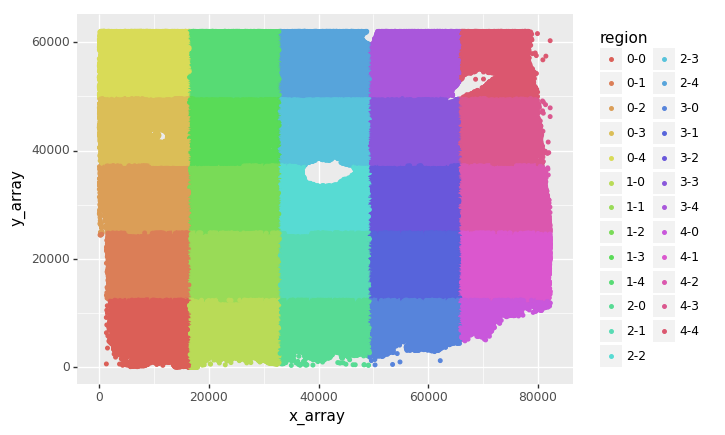

<ggplot: (1426214295034)>

In [25]:
(p9.ggplot(normalLiver.obs, p9.aes("x_array", "y_array", color="region")) + p9.geom_point(size=1, alpha=1))

In [26]:
#nFov = dict(normalLiver.obs.fov.value_counts())
#normalLiver.obs["nFov"] = normalLiver.obs.fov.apply(lambda x: nFov[x])
#(p9.ggplot(normalLiver.obs, p9.aes("x_array", "y_array", color="nFov")) + p9.geom_point(size=1, alpha=1))

In [27]:
#import numpy as np
#def add_noise(image):
#    row,col,ch = image.shape
#    s_vs_p = 0.5
#    amount = 0.004
#    out = np.copy(image)
#    # Salt mode
#    num_salt = np.ceil(amount * image.size * s_vs_p)
#    coords = [np.random.randint(0, i - 1, int(num_salt))
#          for i in image.shape]
#    out[coords] = 1#
#
#    # Pepper mode
#    num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
#    coords = [np.random.randint(0, i - 1, int(num_pepper))
#          for i in image.shape]
#    out[coords] = 0
#    return out

In [27]:
split_adata = []
for region in normalLiver.obs.region.unique():
    mini_adata = normalLiver[(normalLiver.obs.region == region).astype(bool),: ].copy()
    mini_adata.obs["x_array"] = mini_adata.obs.x_slide_mm.rank(method="dense").astype(int)
    mini_adata.obs["y_array"] = mini_adata.obs.y_slide_mm.rank(method="dense").astype(int)


    clusters = mini_adata.obs.cellType.value_counts()[mini_adata.obs.cellType.value_counts() / len(mini_adata) >= 0.01].index.values
    mini_adata = mini_adata[mini_adata.obs.cellType.isin(clusters),:] # remove rare clusters 1% (noise)
    nCluster = mini_adata.obs.cellType.unique().size
    if nCluster >= 4:
        split_adata.append(mini_adata)
        
        mini_adata.obs["x_pixel"] = (mini_adata.obs["x_array"] / 100) + 10
        mini_adata.obs["y_pixel"] = (mini_adata.obs["y_array"] / 100) + 10
        
        mini_adata.write_h5ad(f"data/cosMx_human_liver/region_{N}_{N}/N{region}.h5ad")
        
        ## add dymmy image
        
        img = Image.new('RGB', (int(mini_adata.obs.x_array.max() / 100) + 50, int(mini_adata.obs.y_array.max() / 100) + 50), color = (255,255,255))
        img.save(f"data/cosMx_human_liver/region_{N}_{N}/N{region}.jpg")
        
    else:
        print(f"Empty for: {region} with nCluster: {nCluster}")

/scratch/slurm-job.1655334/ipykernel_1981446/2286677909.py:14: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
/scratch/slurm-job.1655334/ipykernel_1981446/2286677909.py:14: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
/scratch/slurm-job.1655334/ipykernel_1981446/2286677909.py:14: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
/scratch/slurm-job.1655334/ipykernel_1981446/2286677909.py:14: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
/scratch/slurm-job.1655334/ipykernel_1981446/2286677909.py:14: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
/scratch/slurm-job.1655334/ipykernel_1981446/2286677909.py:14: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
/scratch/slurm-j

In [28]:
cancerousLiver = adata[adata.obs.Run_Tissue_name != "NormalLiver",:]
cancerousLiver

View of AnnData object with n_obs × n_vars = 460436 × 1000
    obs: 'RNA_pca_cluster_default', 'RNA_pca_cluster_default.1', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_negprobes', 'nFeature_negprobes', 'nCount_falsecode', 'nFeature_falsecode', 'fov', 'Area', 'AspectRatio', 'Width', 'Height', 'Mean.PanCK', 'Max.PanCK', 'Mean.CK8.18', 'Max.CK8.18', 'Mean.Membrane', 'Max.Membrane', 'Mean.CD45', 'Max.CD45', 'Mean.DAPI', 'Max.DAPI', 'cell_id', 'assay_type', 'Run_name', 'slide_ID_numeric', 'Run_Tissue_name', 'Panel', 'Mean.Yellow', 'Max.Yellow', 'Mean.CD298_B2M', 'Max.CD298_B2M', 'cell_ID', 'x_FOV_px', 'y_FOV_px', 'x_slide_mm', 'y_slide_mm', 'propNegative', 'complexity', 'errorCtEstimate', 'percOfDataFromError', 'qcFlagsRNACounts', 'qcFlagsCellCounts', 'qcFlagsCellPropNeg', 'qcFlagsCellComplex', 'qcFlagsCellArea', 'median_negprobes', 'negprobes_quantile_0.9', 'median_RNA', 'RNA_quantile_0.9', 'nCell', 'nCount', 'nCountPerCell', 'nFeaturePerCell', 'propNegativeCellAvg', 'complexityCel

In [29]:
cancerousLiver.obs["x_array"] = cancerousLiver.obs.x_slide_mm.rank(method="dense").astype(int)
cancerousLiver.obs["y_array"] = cancerousLiver.obs.y_slide_mm.rank(method="dense").astype(int)

cancerousLiver.obs["x_region"] = pd.cut(cancerousLiver.obs["x_array"], N, labels=False)
cancerousLiver.obs["y_region"] = pd.cut(cancerousLiver.obs["y_array"], N, labels=False)
cancerousLiver.obs["region"] = cancerousLiver.obs.apply(lambda x: f"{x.x_region}-{x.y_region}", axis=1)
cancerousLiver.obs[["region"]].value_counts()

/scratch/slurm-job.1655334/ipykernel_1981446/738889203.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


region
0-3       31323
1-2       30889
1-3       29144
4-2       28938
1-4       26880
4-1       25400
3-1       24636
0-4       24053
0-2       23966
3-3       21989
2-2       21619
3-0       20748
2-3       20610
1-1       19469
3-2       19196
2-4       18342
2-1       18043
4-3       17356
3-4       17165
2-0       12314
4-0        5242
4-4        2788
0-1         326
dtype: int64

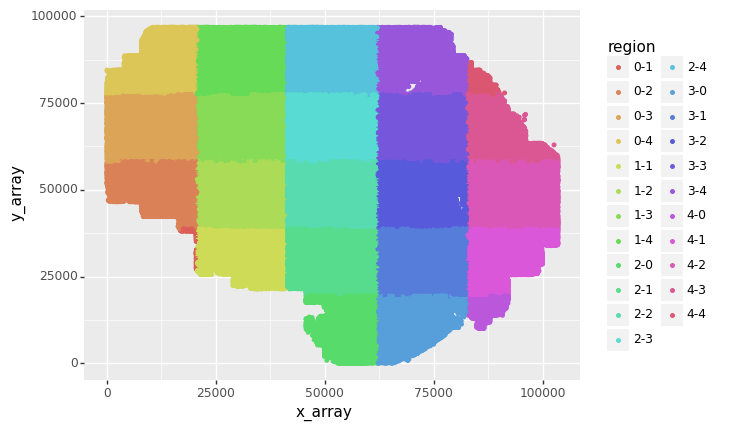

<ggplot: (1425868221486)>

In [30]:
(p9.ggplot(cancerousLiver.obs, p9.aes("x_array", "y_array", color="region")) + p9.geom_point(size=1, alpha=1))

In [31]:
split_adata = []
for region in cancerousLiver.obs.region.unique():
    mini_adata = cancerousLiver[(cancerousLiver.obs.region == region).astype(bool),: ].copy()
    mini_adata.obs["x_array"] = mini_adata.obs.x_slide_mm.rank(method="dense").astype(int)
    mini_adata.obs["y_array"] = mini_adata.obs.y_slide_mm.rank(method="dense").astype(int)


    clusters = mini_adata.obs.cellType.value_counts()[mini_adata.obs.cellType.value_counts() / len(mini_adata) >= 0.01].index.values
    mini_adata = mini_adata[mini_adata.obs.cellType.isin(clusters),:] # remove rare clusters 1% (noise)
    nCluster = mini_adata.obs.cellType.unique().size
    if nCluster >= 4:
        split_adata.append(mini_adata)
        
        mini_adata.obs["x_pixel"] = (mini_adata.obs["x_array"] / 100) + 10
        mini_adata.obs["y_pixel"] = (mini_adata.obs["y_array"] / 100) + 10
        
        mini_adata.write_h5ad(f"data/cosMx_human_liver/region_{N}_{N}/C{region}.h5ad")
        
        ## add dymmy image
        img = Image.new('RGB', (int(mini_adata.obs.x_array.max() / 100) + 50, int(mini_adata.obs.y_array.max() / 100) + 50), color = (255,255,255))
        img.save(f"data/cosMx_human_liver/region_{N}_{N}/C{region}.jpg")
        
    else:
        print(f"Empty for: {region} with nCluster: {nCluster}")

/scratch/slurm-job.1655334/ipykernel_1981446/2971480552.py:14: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
/scratch/slurm-job.1655334/ipykernel_1981446/2971480552.py:14: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
/scratch/slurm-job.1655334/ipykernel_1981446/2971480552.py:14: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
/scratch/slurm-job.1655334/ipykernel_1981446/2971480552.py:14: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
/scratch/slurm-job.1655334/ipykernel_1981446/2971480552.py:14: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
/scratch/slurm-job.1655334/ipykernel_1981446/2971480552.py:14: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
/scratch/slurm-j

In [32]:
files = glob.glob(F"data/cosMx_human_liver/region_{N}_{N}/C*.h5ad")
files = [f.split("/")[-1].split(".")[0] for f in files]
nComb = len(files)
#np.random.shuffle(files)
files = files
files[:2]

['C1-4', 'C4-1']

In [33]:
for f in files:
    print(f"- {f}")

- C1-4
- C4-1
- C3-4
- C0-3
- C3-1
- C4-3
- C3-3
- C2-4
- C4-0
- C2-2
- C4-4
- C4-2
- C0-1
- C0-2
- C2-3
- C1-1
- C2-0
- C1-2
- C0-4
- C1-3
- C2-1
- C3-0
- C3-2


In [34]:
import itertools
for l in itertools.combinations(files, nComb - 1):
    l = list(l)
    element = ""
    break_loop = False
    for f in files:
        if f not in l:
            element = f
            files = [file for file in files if element != file]
            break
    print(f"- [['{element}'], {l}]")

- [['C3-2'], ['C1-4', 'C4-1', 'C3-4', 'C0-3', 'C3-1', 'C4-3', 'C3-3', 'C2-4', 'C4-0', 'C2-2', 'C4-4', 'C4-2', 'C0-1', 'C0-2', 'C2-3', 'C1-1', 'C2-0', 'C1-2', 'C0-4', 'C1-3', 'C2-1', 'C3-0']]
- [['C3-0'], ['C1-4', 'C4-1', 'C3-4', 'C0-3', 'C3-1', 'C4-3', 'C3-3', 'C2-4', 'C4-0', 'C2-2', 'C4-4', 'C4-2', 'C0-1', 'C0-2', 'C2-3', 'C1-1', 'C2-0', 'C1-2', 'C0-4', 'C1-3', 'C2-1', 'C3-2']]
- [['C2-1'], ['C1-4', 'C4-1', 'C3-4', 'C0-3', 'C3-1', 'C4-3', 'C3-3', 'C2-4', 'C4-0', 'C2-2', 'C4-4', 'C4-2', 'C0-1', 'C0-2', 'C2-3', 'C1-1', 'C2-0', 'C1-2', 'C0-4', 'C1-3', 'C3-0', 'C3-2']]
- [['C1-3'], ['C1-4', 'C4-1', 'C3-4', 'C0-3', 'C3-1', 'C4-3', 'C3-3', 'C2-4', 'C4-0', 'C2-2', 'C4-4', 'C4-2', 'C0-1', 'C0-2', 'C2-3', 'C1-1', 'C2-0', 'C1-2', 'C0-4', 'C2-1', 'C3-0', 'C3-2']]
- [['C0-4'], ['C1-4', 'C4-1', 'C3-4', 'C0-3', 'C3-1', 'C4-3', 'C3-3', 'C2-4', 'C4-0', 'C2-2', 'C4-4', 'C4-2', 'C0-1', 'C0-2', 'C2-3', 'C1-1', 'C2-0', 'C1-2', 'C1-3', 'C2-1', 'C3-0', 'C3-2']]
- [['C1-2'], ['C1-4', 'C4-1', 'C3-4', 'C0-3',

In [35]:
for l in itertools.combinations(files, nComb - 1):
    print(l)

In [36]:
len(files)

0